In [10]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('./livros.csv')

In [12]:
df = df[['titulo', 'autor', 'ano', 'editora', 'rating', 'descricao']]

<AxesSubplot: title={'center': 'Distribuição do número de palavras das descrições dos livros'}, ylabel='Frequency'>

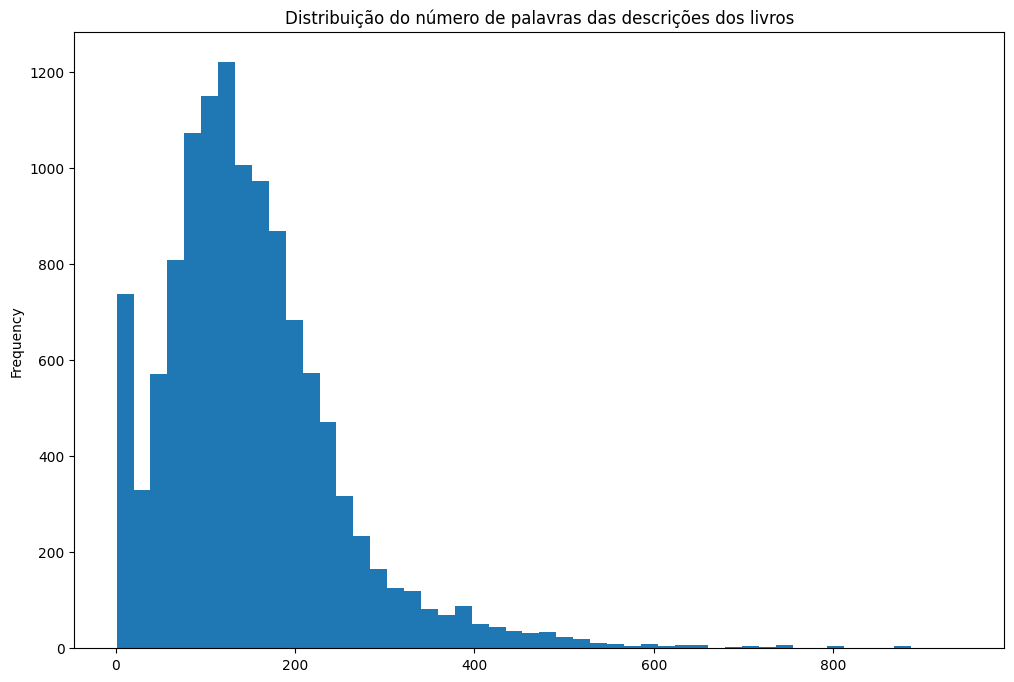

In [13]:
df['n_palavras'] = df['descricao'].apply(lambda x: len(str(x).split()))

df['n_palavras'].plot(
  kind = 'hist',
  bins = 50,
  figsize = (12, 8),
  title = 'Distribuição do número de palavras das descrições dos livros'
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TRT05\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot: title={'center': 'Distribuição das 20 palavras mais frequentes nas descrições dos livros'}, xlabel='palavra'>

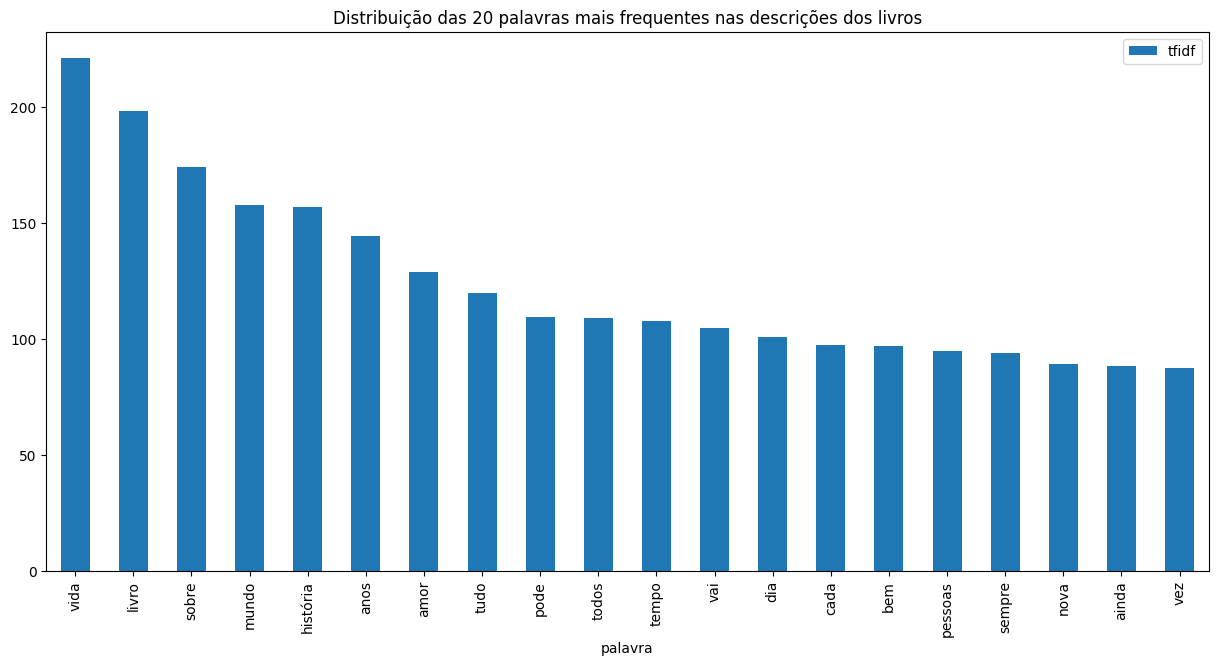

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
tf = TfidfVectorizer(ngram_range = (1, 1), stop_words = stopwords.words('portuguese'), lowercase = True)
tfidf_matrix = tf.fit_transform(df['descricao'].values.astype('U'))
total_words = tfidf_matrix.sum(axis = 0)
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items() if str(word) != 'nan']
freq = sorted(freq, key = lambda x: x[1], reverse = True)
df_palavras = pd.DataFrame(freq)
df_palavras.rename(columns = {0: 'palavra', 1: 'tfidf'}, inplace = True)
df_palavras = df_palavras.head(20)
df_palavras.plot(x = 'palavra', y = 'tfidf', kind = 'bar',
                title = 'Distribuição das 20 palavras mais frequentes nas descrições dos livros',
                figsize = (15,7))

<AxesSubplot: title={'center': 'Distribuição dos 20 bigramas mais frequentes nas descrições dos livros'}, xlabel='bigrama'>

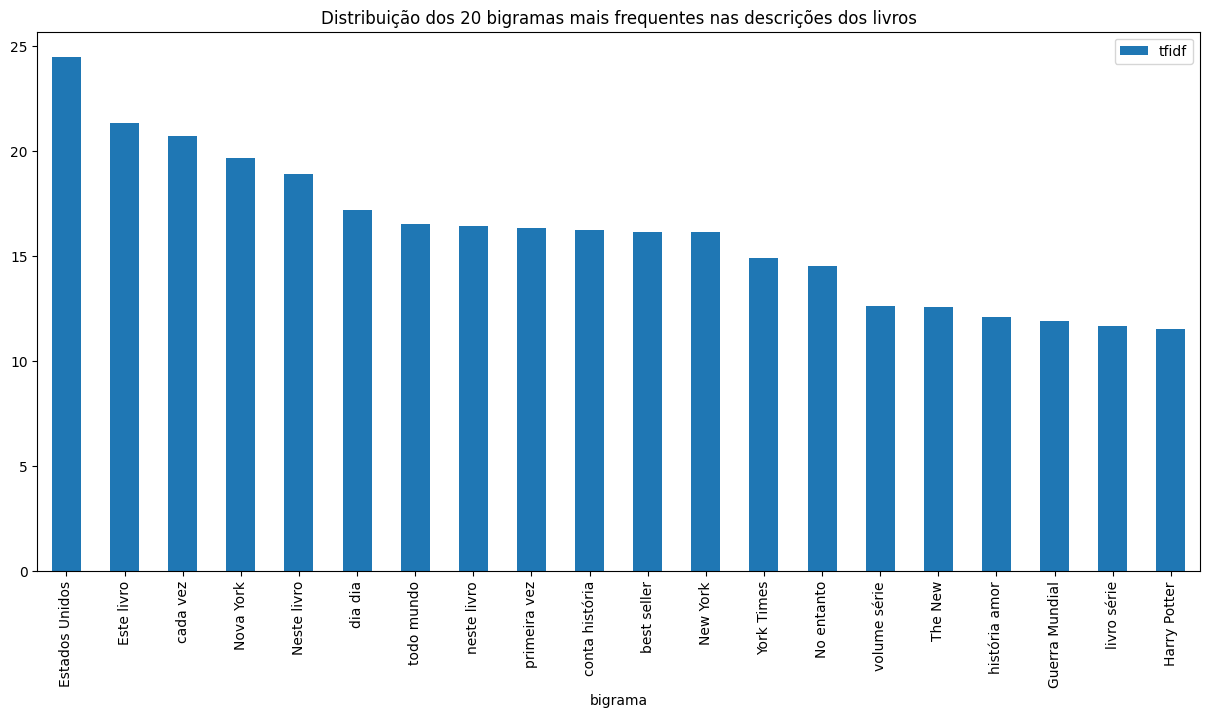

In [21]:
tf = TfidfVectorizer(ngram_range = (2, 2), stop_words = stopwords.words('portuguese'), lowercase = False)
tfidf_matrix = tf.fit_transform(df['descricao'].values.astype('U'))
total_words = tfidf_matrix.sum(axis = 0)
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse = True)
df_bigramas = pd.DataFrame(freq)
df_bigramas.rename(columns = {0: 'bigrama', 1: 'tfidf'}, inplace = True)
df_bigramas = df_bigramas.head(20)
df_bigramas.plot(x = 'bigrama', y = 'tfidf', kind = 'bar',
                title = 'Distribuição dos 20 bigramas mais frequentes nas descrições dos livros',
                figsize = (15,7))

<AxesSubplot: title={'center': 'Distribuição dos 20 trigramas mais frequentes nas descrições dos livros'}, xlabel='trigrama'>

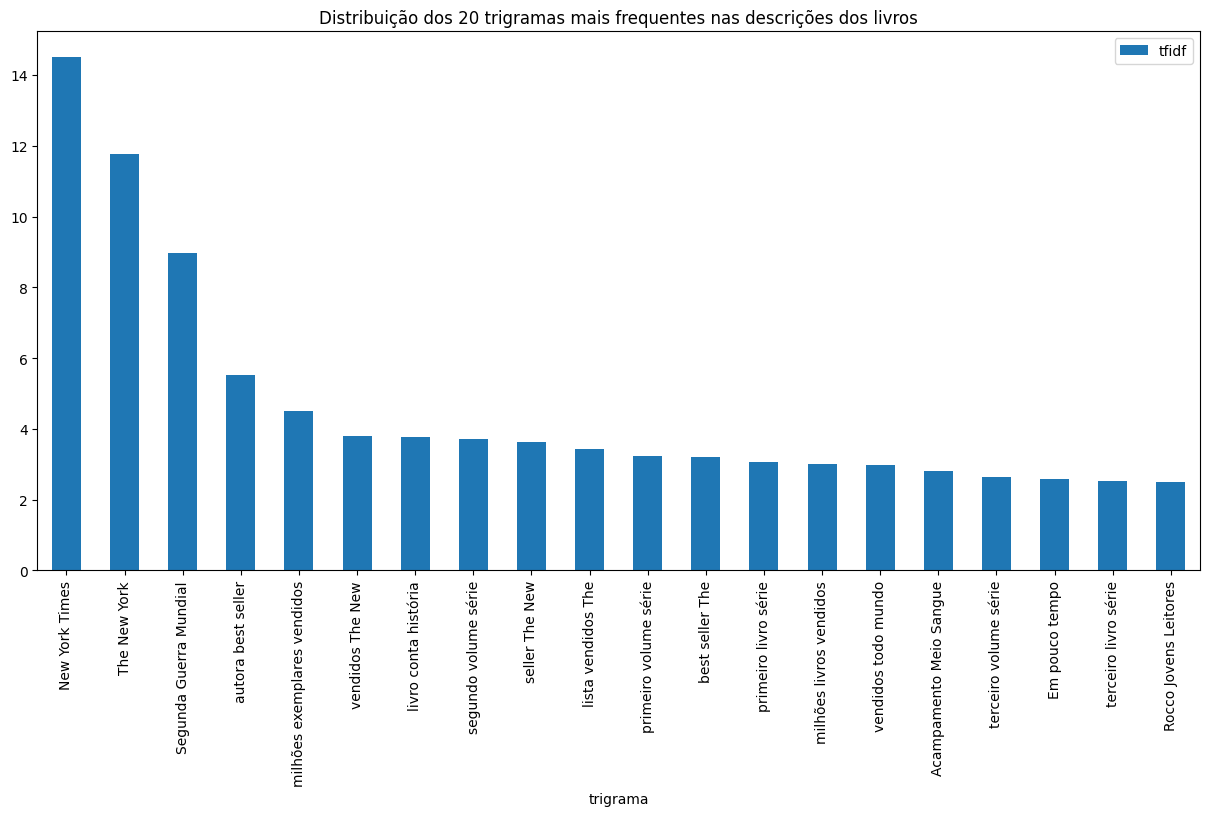

In [22]:
tf = TfidfVectorizer(ngram_range = (3, 3), stop_words = stopwords.words('portuguese'), lowercase = False)
tfidf_matrix = tf.fit_transform(df['descricao'].values.astype('U'))
total_words = tfidf_matrix.sum(axis = 0)
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
df_trigramas = pd.DataFrame(freq)
df_trigramas.rename(columns = {0:'trigrama', 1: 'tfidf'}, inplace = True)
df_trigramas = df_trigramas.head(20)
df_trigramas.plot(x = 'trigrama', y = 'tfidf', kind = 'bar',
                title = 'Distribuição dos 20 trigramas mais frequentes nas descrições dos livros',
                figsize = (15,7))
